In [1]:
import datacube
#dc = datacube.Datacube(env='sentinel2betatmp', config='/home/547/aw3463/.sent2.conf')
dc = datacube.Datacube()
query={'time': ('2015-01-01', '2015-12-31'),
 'lat': (-35.1030749155991, -35.082211751067566),
 'lon': (149.4513284392872, 149.4727782273795),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
b_names = ['nbar_coastal_aerosol', 'nbar_blue', 'nbar_green', 'nbar_red', 'nbar_red_edge_1', 'nbar_red_edge_2', 'nbar_red_edge_3', 'nbar_nir_1', 'nbar_nir_2', 'nbar_swir_2', 'nbar_swir_3']
#sat_array = dc.load(product='s2b_ard_granule', measurements=b_names, **query)
sat_array = dc.load(product='ls8_nbar_scene', **query)
sat_array.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)


<xarray.Dataset>
Dimensions:          (time: 22, x: 91, y: 104)
Coordinates:
  * time             (time) datetime64[ns] 2015-01-02T23:50:19.500000 ...
  * y                (y) float64 -3.94e+06 -3.94e+06 -3.94e+06 -3.94e+06 ...
  * x                (x) float64 1.582e+06 1.582e+06 1.582e+06 1.582e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 561 566 574 593 608 620 633 640 641 ...
    blue             (time, y, x) int16 545 553 564 577 589 602 616 626 624 ...
    green            (time, y, x) int16 683 683 691 701 710 720 731 738 735 ...
    red              (time, y, x) int16 708 715 726 740 753 766 778 787 783 ...
    nir              (time, y, x) int16 1641 1602 1574 1541 1497 1465 1449 ...
    swir1            (time, y, x) int16 1863 1879 1900 1912 1911 1904 1887 ...
    swir2            (time, y, x) int16 1279 1301 1331 1357 1371 1374 1368 ...
Attributes:
    crs:      EPSG:3577

In [2]:
durf = 100*sat_array.groupby('time').std()/sat_array.groupby('time').mean()

In [3]:
spee = durf.to_dataframe()


In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 9.5))
spee.hist(ax=axes)

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee9ad3fc18>,
      dtype=object)

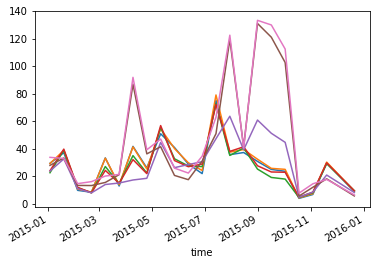

In [5]:
spee.plot(legend=False)


In [6]:
#query={'time': ('2018-02-05', '2018-02-15'),
# 'lat': (-30.595141582265763, -30.573900084400902),
# 'lon': (115.14502132590322, 115.16618234076345),
# 'output_crs': 'EPSG:3577',
# 'resampling': 'bilinear',
# 'resolution': (-25.0, 25.0)}
#sat_array2 = dc.load(product='ls8_nbar_scene', **query)
#sat_array2.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)
#sat_array2

In [7]:
import DEAPlotting
#DEAPlotting.three_band_image(sat_array2, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [8]:
query={'time': ('2015-01-01', '2015-12-31'),
 'lat': (-35.1030749155991, -35.082211751067566),
 'lon': (149.4513284392872, 149.4727782273795),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
data = dc.load(product='ls8_nbart_geomedian_annual', **query)
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 91, y: 104)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01
  * y        (y) float64 -3.94e+06 -3.94e+06 -3.94e+06 -3.94e+06 -3.94e+06 ...
  * x        (x) float64 1.582e+06 1.582e+06 1.582e+06 1.582e+06 1.582e+06 ...
Data variables:
    blue     (time, y, x) int16 549 567 586 607 607 602 595 602 544 534 572 ...
    green    (time, y, x) int16 704 721 740 772 792 782 763 771 708 700 748 ...
    red      (time, y, x) int16 753 779 801 832 842 836 818 822 755 742 791 ...
    nir      (time, y, x) int16 1484 1510 1526 1572 1589 1577 1566 1552 1523 ...
    swir1    (time, y, x) int16 1341 1363 1382 1439 1514 1522 1449 1430 1426 ...
    swir2    (time, y, x) int16 898 918 934 978 1033 1035 979 983 962 1016 ...
Attributes:
    crs:      EPSG:3577

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fee94092198>)

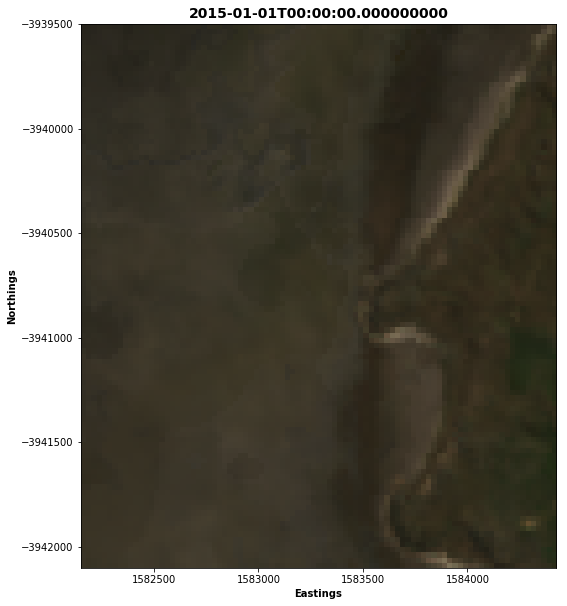

In [9]:
DEAPlotting.three_band_image(data, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [10]:
del sat_array['coastal_aerosol']

In [11]:
norm_diffo = 100*(sat_array - data.squeeze(dim='time'))/data.squeeze(dim='time')
diffo = sat_array - data.squeeze(dim='time')

In [12]:
diffo

<xarray.Dataset>
Dimensions:  (time: 22, x: 91, y: 104)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-02T23:50:19.500000 ...
  * y        (y) float64 -3.94e+06 -3.94e+06 -3.94e+06 -3.94e+06 -3.94e+06 ...
  * x        (x) float64 1.582e+06 1.582e+06 1.582e+06 1.582e+06 1.582e+06 ...
Data variables:
    blue     (time, y, x) int16 -4 -14 -22 -30 -18 0 21 24 80 85 49 53 59 97 ...
    green    (time, y, x) int16 -21 -38 -49 -71 -82 -62 -32 -33 27 31 -15 ...
    red      (time, y, x) int16 -45 -64 -75 -92 -89 -70 -40 -35 28 36 -10 -8 ...
    nir      (time, y, x) int16 157 92 48 -31 -92 -112 -117 -109 -79 -113 ...
    swir1    (time, y, x) int16 522 516 518 473 397 382 438 436 422 310 604 ...
    swir2    (time, y, x) int16 381 383 397 379 338 339 389 372 369 299 499 ...

xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset h

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


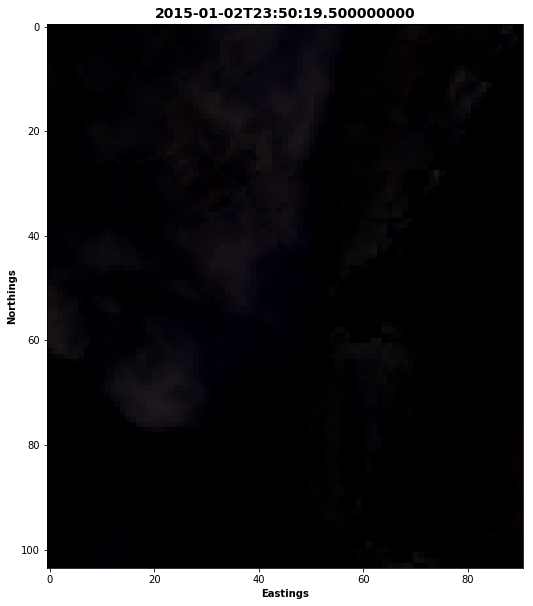

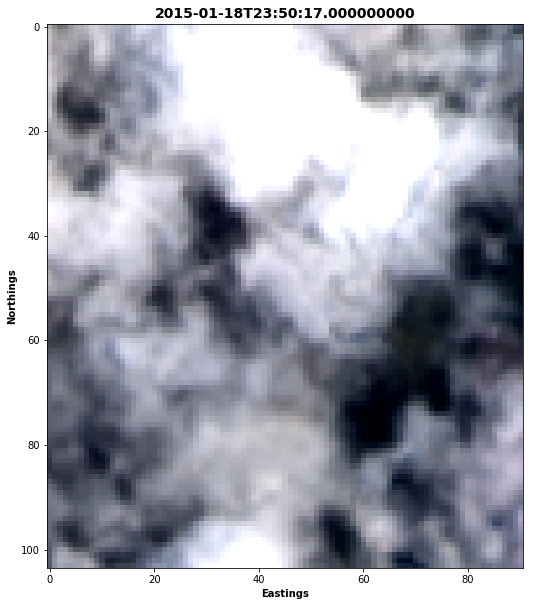

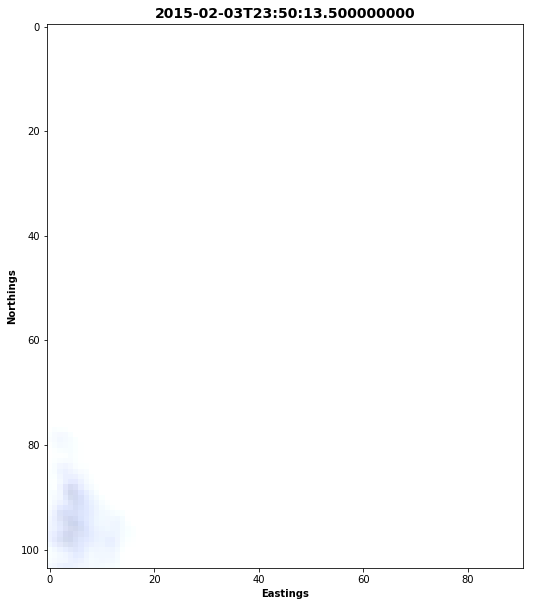

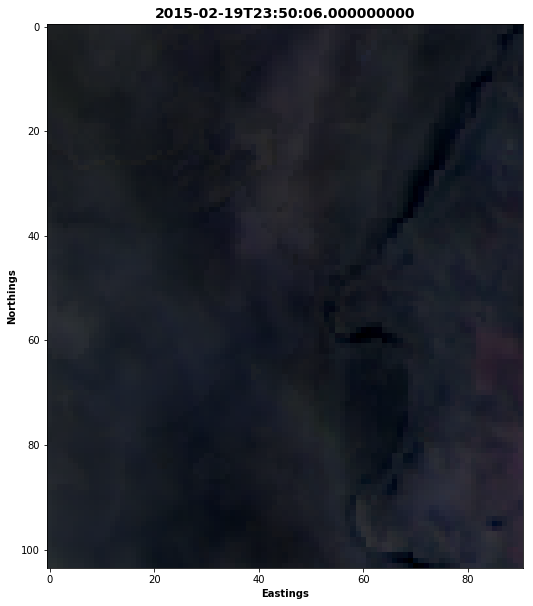

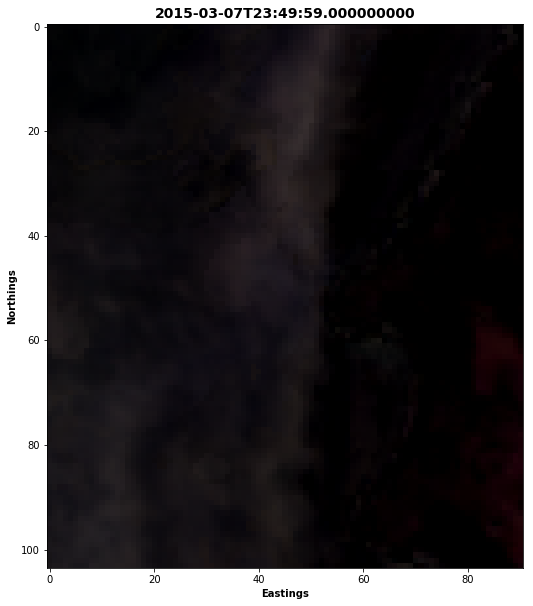

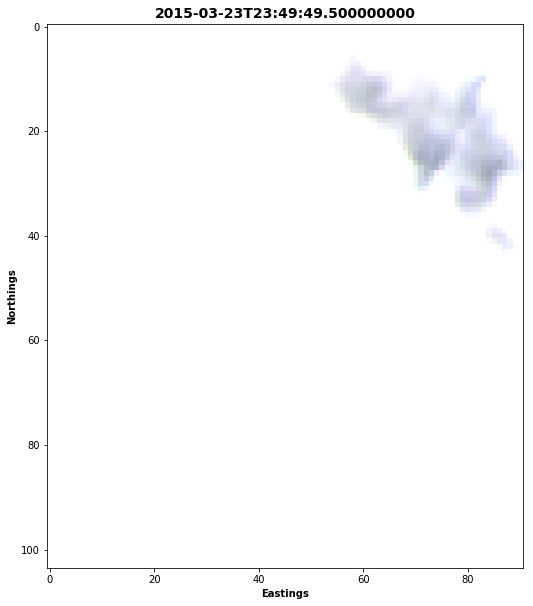

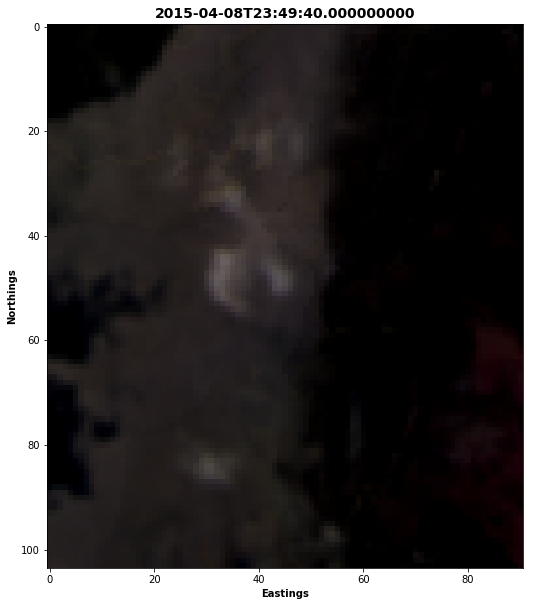

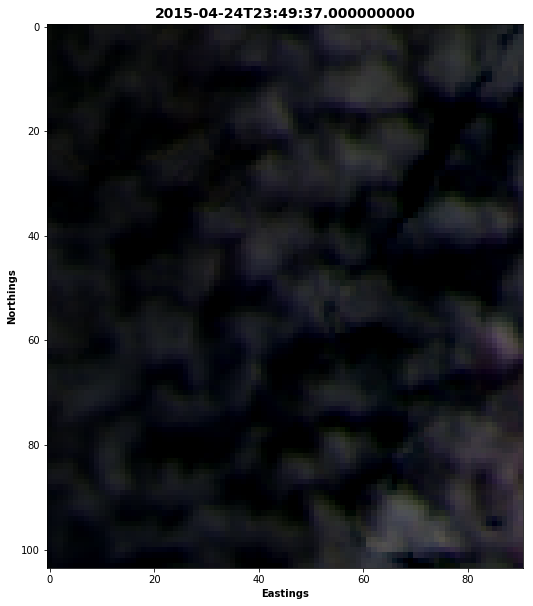

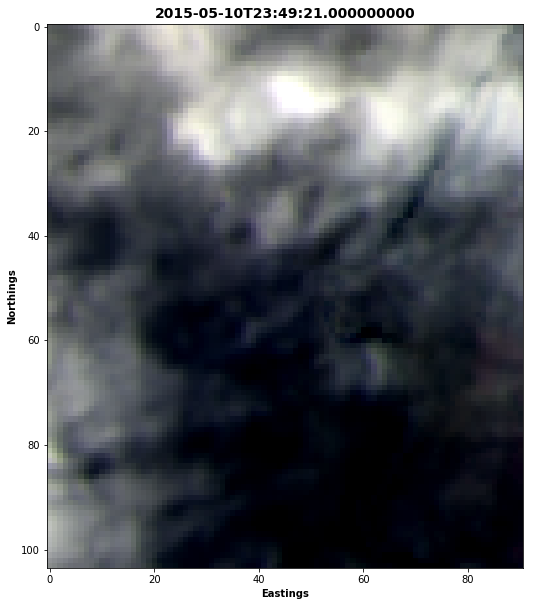

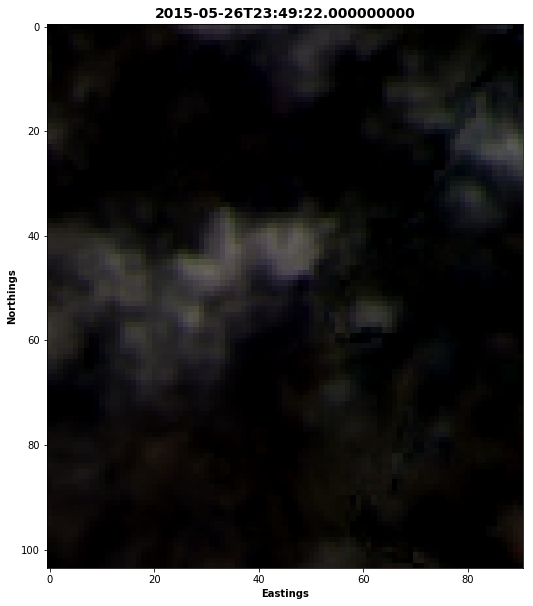

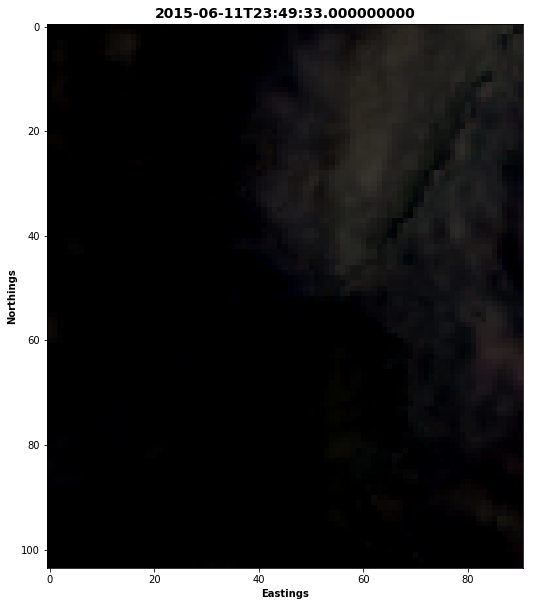

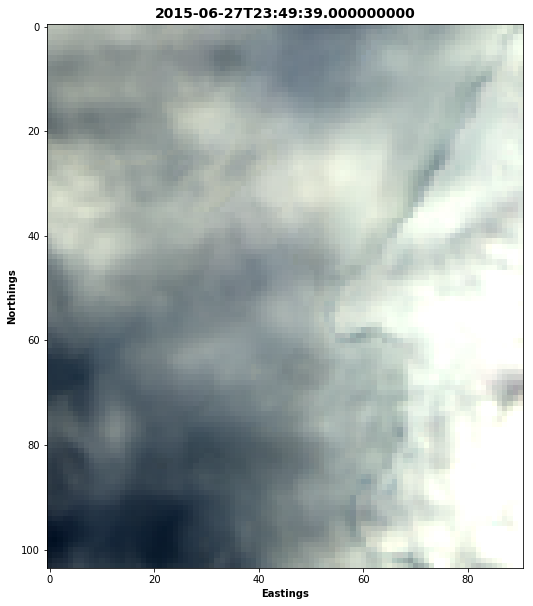

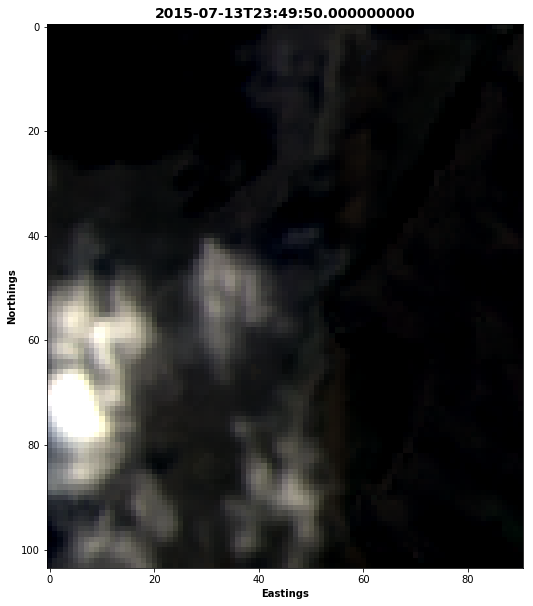

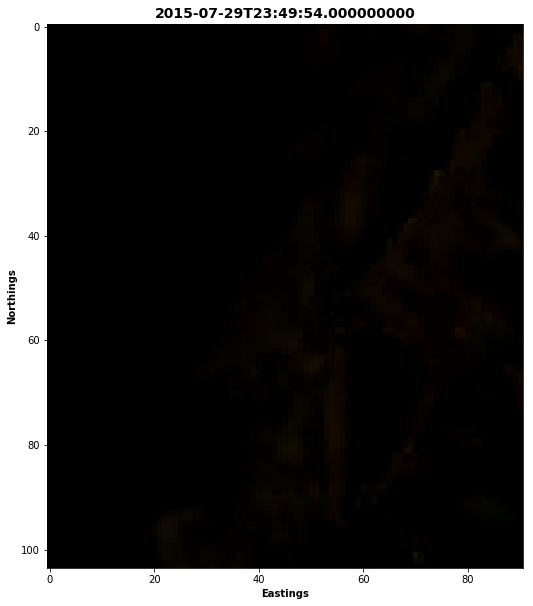

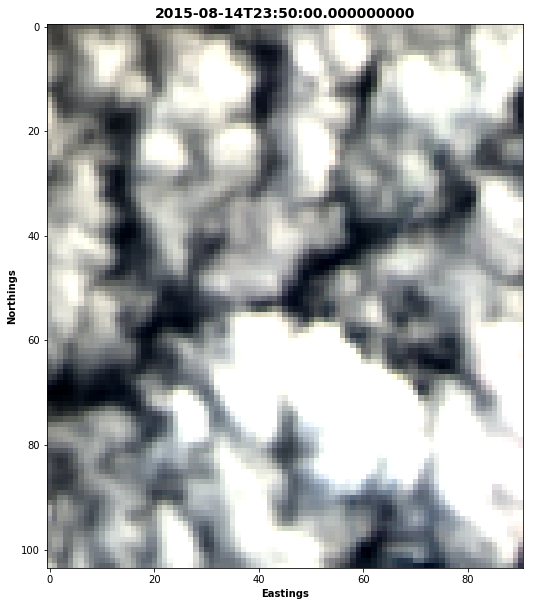

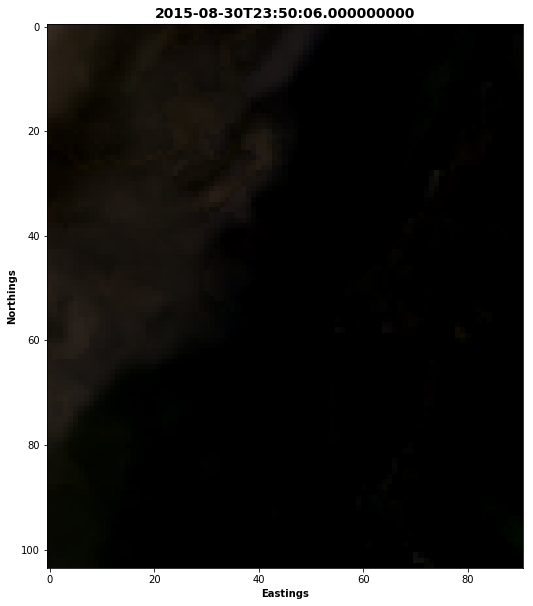

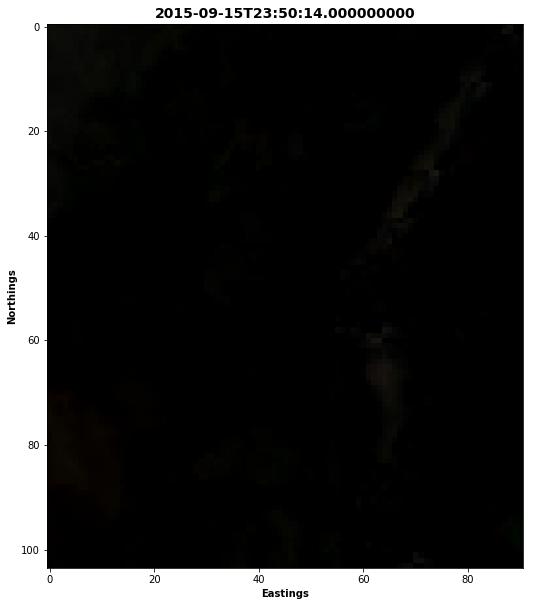

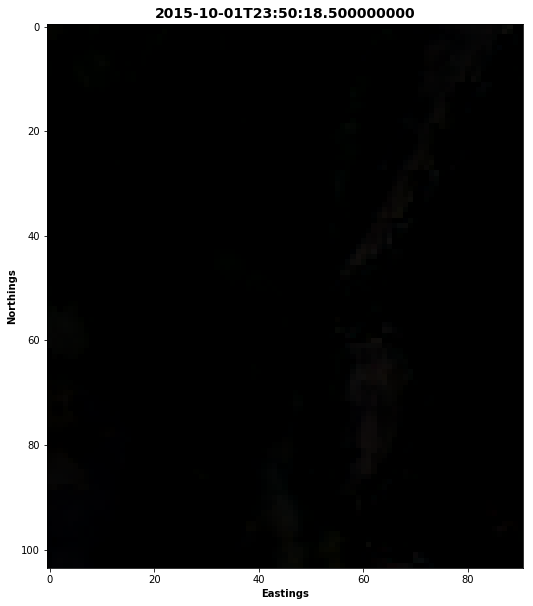

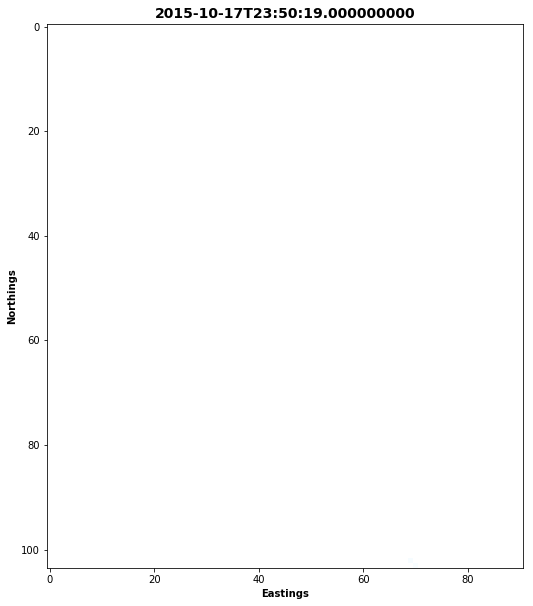

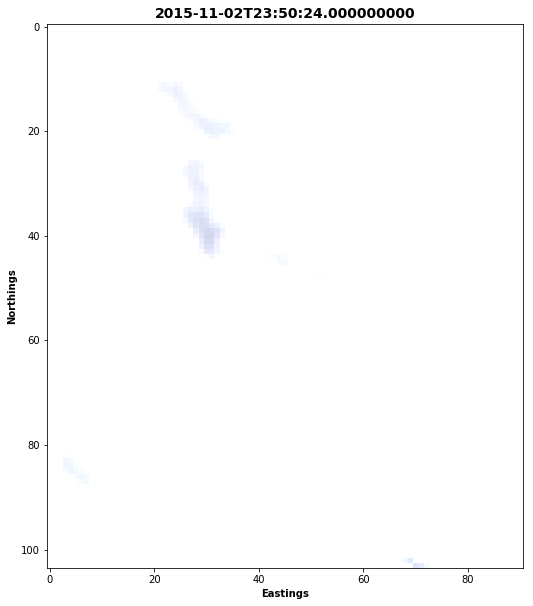

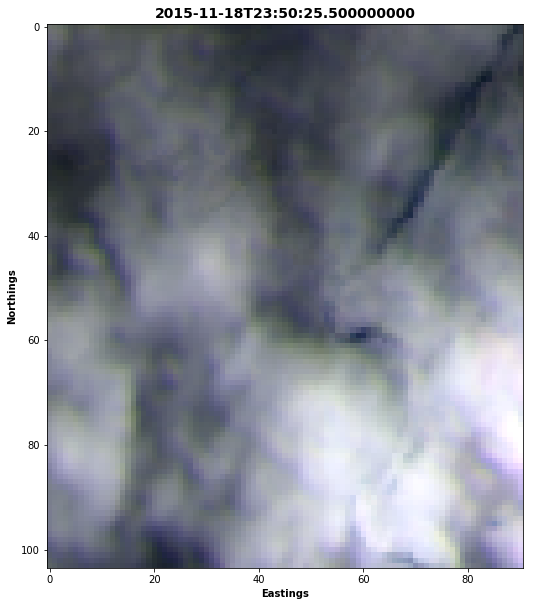

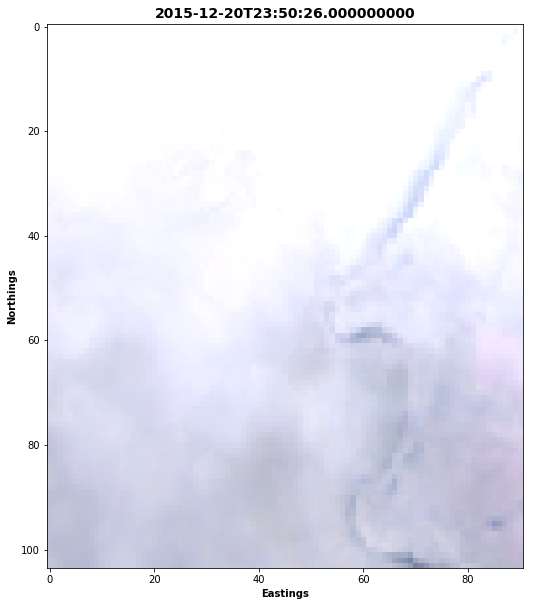

In [13]:
#fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(11.5, 9.5))
#plt.tight_layout(pad=5.5, w_pad=4.5, h_pad=2.5)

for i in range(len(sat_array['time'])):
    DEAPlotting.three_band_image(diffo, bands = ['red', 'green', 'blue'], time = i, contrast_enhance=False)
